In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def cleanup_data(df, df_variables):
    # Drop unecessary column
    df = df.drop(columns=['Process'])
    
    # Remove missing data
    for ts in df.index.unique():
        
        # Remove duplicates if present
        #if df.loc[ts].shape[0] > 3:
        #    df = df.loc[ts].drop_duplicates(subset='Variable')
        
        if df.loc[ts].shape[0] != 3 or set(df_variables) != set(df.loc[ts]['Variable']):
            df = df.drop([ts])
        
        # Variables at given ts
        #ts_variables = df.loc[ts]['Variable']
        
        #if not isinstance(ts_variables,str):
        #    print('Dropping duplicates at timestamp: ', ts)
            # Remove potential duplicates at ts
        #    df.loc[ts].drop_duplicates(subset=['Variable'])

        #if not (set(df_variables) == set(ts_variables)):
            #print('Dropping at timestamp: ', ts)
        #    df = df.drop([ts])
            
    
    
    # Sort data based on variable
    new_df = pd.DataFrame()
    
    # 
    for variable in df_variables:
        # Get data for variable
        data = df.loc[df['Variable'] == variable]
        
        # Insert data to new dataframe with column header
        new_df.insert(0, variable, data['Value'].values)
        
    return new_df

def plot_usv_contour(ax, df, width=10, height=5, tip_height=18, color='k'):
    w = width
    h = height
    l = tip_height
    
    # Number of values
    N = df.shape[0]
    
    # Plot contour for all steps
    for n in range(0, N//2 + N//4 + N//6, N//3):
        # Create USV shape
        #if (n == 0) or (n == df.shape[0] - 1): # Different color for start/finish and other points
        #    shape = mpl.patches.Polygon([(-w/2,-h/2), (-w/2, h/2), (w/2, h/2), (l/2,0), (w/2, -h/2)], color='red', fill=True)
        #else:
        #    shape = mpl.patches.Polygon([(-w/2,-h/2), (-w/2, h/2), (w/2, h/2), (l/2,0), (w/2, -h/2)], color=color, fill=True)
        
        # Create USV shape
        shape = mpl.patches.Polygon([(-w/2,-h/2), (-w/2, h/2), (w/2, h/2), (l/2,0), (w/2, -h/2)], color=color, fill=True, zorder=2)

        
        # NED Values
        x_n = df['NAV_X'].values[n]
        y_n = df['NAV_Y'].values[n]
        h_n = df['NAV_HEADING'].values[n]
        
        # ECEF Values
        
        
        
        # Transform applied at each step
        t = mpl.transforms.Affine2D().rotate_deg_around(0, 0, 90 - h_n).translate(x_n, y_n) + ax.transData
        shape.set_transform(t)

        ax.add_patch(shape)

# Prepare data

In [3]:
df_names = ["Timestamp", "Variable", "Process", "Value"]
df_variables = ['NAV_X', 'NAV_Y', 'NAV_HEADING']

datafolder = "~/moos-ivp-pt/plotting/logfiles/bcmpc_scenario_3/non_colregs_compliant/"

In [4]:
os_path = datafolder + "os.alog"

os_df = pd.read_fwf(os_path, header=None, index_col=0, names=df_names, skiprows=5)
os_df = cleanup_data(os_df, df_variables)

In [5]:
cn_1_path = datafolder + "cn_1.alog"

cn_1_df = pd.read_fwf(cn_1_path, header=None, index_col=0, names=df_names, skiprows=5)
cn_1_df = cleanup_data(cn_1_df, df_variables)

# remove last n=70 frames
cn_1_df.drop(cn_1_df.tail(85).index,inplace=True)

In [6]:
cn_2_path = datafolder + "cn_2.alog"

cn_2_df = pd.read_fwf(cn_2_path, header=None, index_col=0, names=df_names, skiprows=5)
cn_2_df = cleanup_data(cn_2_df, df_variables)

In [7]:
cn_3_path = datafolder + "cn_3.alog"

cn_3_df = pd.read_fwf(cn_3_path, header=None, index_col=0, names=df_names, skiprows=5)
cn_3_df = cleanup_data(cn_3_df, df_variables)

# Plotting

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


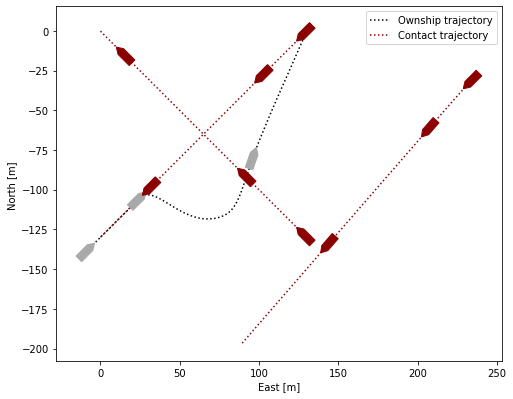

In [8]:
plt.figure(figsize=(8,8))
ax = plt.gca()

# Set USV Plot settings
os_trj_color = 'k'
os_color = 'darkgray'
os_label = 'Ownship trajectory'

cn_1_trj_color = 'darkred'
cn_1_color = 'darkred'
cn_1_label = 'Contact trajectory'

cn_2_trj_color = 'darkred'
cn_2_color = 'darkred'
cn_2_label = 'Contact 2 trajectory'

cn_3_trj_color = 'darkred'
cn_3_color = 'darkred'
cn_3_label = 'Contact 3 trajectory'

cn_4_trj_color = 'darkred'
cn_4_color = 'darkred'
cn_4_label = 'Contact 4 trajectory'

cn_5_trj_color = 'darkred'
cn_5_color = 'darkred'
cn_5_label = 'Contact 5 trajectory'

cn_6_trj_color = 'darkred'
cn_6_color = 'darkred'
cn_6_label = 'Contact 6 trajectory'


# Plot trajectories
plt.plot(os_df['NAV_X'].values, os_df['NAV_Y'].values, color=os_trj_color, linestyle=':', label=os_label, zorder=0)
plt.plot(cn_1_df['NAV_X'].values, cn_1_df['NAV_Y'].values, color=cn_1_trj_color, linestyle=':', label=cn_1_label, zorder=0)
plt.plot(cn_2_df['NAV_X'].values, cn_2_df['NAV_Y'].values, color=cn_2_trj_color, linestyle=':', zorder=0)#, label=cn_2_label, zorder=0)
plt.plot(cn_3_df['NAV_X'].values, cn_3_df['NAV_Y'].values, color=cn_3_trj_color, linestyle=':', zorder=0)#, label=cn_3_label, zorder=0)
#plt.plot(cn_4_df['NAV_X'].values, cn_4_df['NAV_Y'].values, color=cn_4_trj_color, linestyle=':', zorder=0)#, label=cn_4_label, zorder=0)
#plt.plot(cn_5_df['NAV_X'].values, cn_5_df['NAV_Y'].values, color=cn_5_trj_color, linestyle=':', zorder=0)#, label=cn_5_label, zorder=0)
#plt.plot(cn_6_df['NAV_X'].values, cn_6_df['NAV_Y'].values, color=cn_6_trj_color, linestyle=':', zorder=0)#, label=cn_6_label, zorder=0)


# Plot USV contours
plot_usv_contour(ax, os_df, color=os_color)
plot_usv_contour(ax, cn_1_df, color=cn_1_color)
plot_usv_contour(ax, cn_2_df, color=cn_2_color)
plot_usv_contour(ax, cn_3_df, color=cn_3_color)
#plot_usv_contour(ax, cn_4_df, color=cn_4_color)
#plot_usv_contour(ax, cn_5_df, color=cn_5_color)
#plot_usv_contour(ax, cn_6_df, color=cn_6_color)


# Customize
plt.legend()
plt.ylabel('North [m] ')
plt.xlabel('East [m]')
plt.gca().set_aspect('equal')
#plt.axis('square')

plt.savefig('plots/moos_bcmpc_scenario_3_non_colregs_compliant.eps')
plt.show()
